## Week 5: PageRank
## *Computing Pagerank and custom functions*

### Objective
This week objective is to write a function to compute the **PageRank** of the nodes in the graph and identify the node with the *highest value*. Moreover, we need to compare it with the one we got in Week 3 and draw our conclusions,as well as providing the **cumulative distribution** and again comparing it with the one we got in Week 3, commenting all the results obtained. 

## *PageRank function*
First of all, with the `load_graph()` function we read nodes and edges from the CSV files and constructed a directed graph. Then, we implemented a **PageRank function** that we called `calculate_pagerank()`: it initializes the PageRank scores at $1/n$, with $n$ representing the number of nodes; this means that at the beginning each node is considered equally important. After that the function iteratively updates them using the formula:

$Rank(v)_{t} = { {\alpha \over N} + {(1 - \alpha)} * ( \sum_{u_{i}}{Rank(u_{i})_{t-1} \over OutDegree(u_{i})} + \sum_{u_{j}}{Rank(u_{j})_{t-1} \over N})}$

Here:
- $v$ is the *node* for which we are *computing* the PageRank
- $t$ is the *current iteration* of the algorithm
- $\alpha$ is the *teleportation factor*
- $N$ is the *number of nodes*
- $u_i$ is each node that *links to node v*
- $u_j$ is each node that has *out-degree = 0*

At each iteration, it checks if the PageRank values have converged, and this is done by calculating the *sum of absolute differences* between the new and old PageRank scores. 

### Understanding the PageRank function
If it is less than $1×10^{−6}$, it considers the algorithm to have *converged*. Finally, the function returns the *PageRank values* and the *number of iterations* it took to converge. If the PageRank doesn't converge within the specified number of iterations, it will return the *values at the last iteration*.The **PageRank values** that are returned represent the relative **"importance" or "authority"** of each node within the network. Nodes with **higher PageRank values** are considered to be **more important or to have more influence** within the network.

## *Cumulative distribution function*
In the second part of this week, we had to provide a **cumulative distribution** and compare it with the one we got in Week 3. In order to achieve this, the function `plot_cumulative_distribution()` takes a *dictionary of centrality values* (in this context, PageRank values) and a *title string* as its arguments. 

### Understanding the cumulative distribution
This function is designed to **visualize** how the **PageRank values are distributed** across all the nodes in the network. It sorts the centrality values in *ascending order* and then computes the *cumulative distribution*, which is a way to show the *percentage of nodes* that have a PageRank value less than or equal to a certain *threshold*, used to **understand the spread of centrality** across the nodes in the graph. This helps us understand what fraction of nodes have low importance versus high importance according to PageRank. A *plot* is created using matplotlib that shows how many nodes have a PageRank value less than or equal to each value on the x-axis.
This type of plot is useful for visualizing the distribution of PageRank values across the graph, showing whether they are **concentrated among a few nodes** or more **evenly distributed**.


Afterwards, we computed the PageRank using the function `calculate_pagerank()` using the graph G. The `plot_cumulative_distribution()` function is called with the *PageRank values* and the *title 'PageRank'* to create and display the cumulative distribution plot.
This algorithm allows us to visualize and understand the *importance of nodes within a network*, such as who are the **most influential or well-connected individuals** in a social network. The visualizations make it *easier* to interpret the data and can *provide insights* into the structure and dynamics of the network.

### Insights gained
It is no surprise to us that the **most important or infuential nodes** are **Rose and Jack**, the two leading character, with a value *approximately equal* (0.028 vs 0.024). They are then followed by the antagonist **Cal**, with a value not far from theirs.\
Since they are the most important nodes, they are also the ones *highlighted by the cumulative distribution* function, showing us how incredibly important these roles are in Titanic's naval ecosystem, creating important relationships between them and with most of the other characters.

**Notes**:
- each time we find code enclosed in `033[1m` and `033[0m`, typically inside a print function, it is because we want to highlight the text in bold
- duplicate versions of the code (like `load_graph()`) can be found in each week: this is because we treated each week assignment as its own, but we will merge the structure in the final report 

### Loading the graph from the given CSV files

In [17]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np

# Load the graph reading the nodes and edges files
def load_graph():
    G = nx.DiGraph()
    with open('../Project/Graph/nodes.csv', 'r') as file:        # Open the CSV file
        reader = csv.DictReader(file)               # DictReader is a class that reads a CSV file and converts it into a dictionary
        for row in reader:                          # Iterate over the rows of the CSV file, each row is a dictionary
            G.add_node(row['Id'], label=row['Label'])   # Add a node to the graph with its id and label

    with open('../Project/Graph/edges.csv', 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=1)  # For directed links
            G.add_edge(row['Target'], row['Source'], weight=1)  # For undirected links

    return G

### Computing Pagerank using a custom function

In [18]:
# `damping_factor` is the probability that the user will continue to click on links

def calculate_pagerank(graph, damping_factor=0.15, num_iterations=100):
    num_nodes = len(graph.nodes())  # Number of nodes in the graph
    pagerank = {node: 1 / num_nodes for node in graph.nodes()}  # Initialize PageRank equally for all nodes (1/N)
    iteration_count = 0 # To keep track of the number of iterations

    for _ in range(num_iterations):  # Iterating for `num_iterations` times
        iteration_count += 1  # Increment the iteration count
        new_pagerank = {node: (1 - damping_factor) / num_nodes for node in graph.nodes()}  # (1-d)/N part
        for node in graph.nodes():  # Iterate over all nodes in the graph
            for neighbor in graph.neighbors(node):  # Iterate over all neighbors of the node
                new_pagerank[neighbor] += damping_factor * pagerank[node] / len(list(graph.neighbors(node)))  # d * PR(Ti)/C(Ti) part

        # Check convergence
        diff = sum([abs(new_pagerank[node] - pagerank[node]) for node in graph.nodes()])  # Sum of the absolute differences between the new and old PageRank values
        if diff < 1e-6:  # If the difference is less than 1*10^-6, then it has converged
            print(f'Converged after \033[1m{iteration_count}\033[0m iterations.')
            print('')
            break
        
        pagerank = new_pagerank

    return pagerank, iteration_count

### Comparing the results with the built-in NetworkX function and drawing conclusions

In [19]:
# Load the graph
G = load_graph()

# Calculate PageRank
pagerank, iteration_count = calculate_pagerank(G)

# Assign PageRank values to nodes and print
for node, rank in pagerank.items():
    G.nodes[node]['pagerank'] = rank
print(G.nodes(data=True))
print('')

# Computing the node with the highest pagerank
max_pagerank = max(pagerank, key=pagerank.get)  
print(f'The node with the highest PageRank is \033[1m{G.nodes[max_pagerank]["label"]}\033[0m with a PageRank of \033[1m{pagerank[max_pagerank]}\033[0m.')
print('')
    
#Top 5 node with the highest pagerank 
top_5_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)[:5]  # Sort the nodes in descending order of PageRank and take the top 5
print(f'The top 5 nodes with the highest PageRank are:')
for node in top_5_pagerank:
    print(f'\033[1m{G.nodes[node]["label"]}\033[0m with a PageRank of \033[1m{pagerank[node]}\033[0m.')
print('')

# Compute pagerank using the built-in function
pagerank_nx = nx.pagerank(G, alpha=0.15)

# Compare the two results
print('\033[1mCustom implementation\033[0m: ', pagerank)
print('')
print('\033[1mNetworkX implementation:\033[0m ', pagerank_nx)

Converged after 6 iterations.

[('5097316', {'label': 'ROSE', 'pagerank': 0.028780421775777464}), ('5098095', {'label': 'JACK', 'pagerank': 0.024727069521023652}), ('5097875', {'label': 'CAL', 'pagerank': 0.021152206585810525}), ('5098619', {'label': 'MOLLY', 'pagerank': 0.017157498479811406}), ('5098545', {'label': 'SMITH', 'pagerank': 0.016755920621620225}), ('5101061', {'label': 'LIGHTOLLER', 'pagerank': 0.017078435694338336}), ('5096969', {'label': 'LOVETT', 'pagerank': 0.017969919726246442}), ('5097941', {'label': 'LOVEJOY', 'pagerank': 0.017421873353520804}), ('5098606', {'label': 'ANDREWS', 'pagerank': 0.016559715243617986}), ('5097894', {'label': 'RUTH', 'pagerank': 0.017515474084209094}), ('5098041', {'label': 'OLD ROSE', 'pagerank': 0.015856307524827303}), ('5096948', {'label': 'BODINE', 'pagerank': 0.01565138368230474}), ('5098128', {'label': 'FABRIZIO', 'pagerank': 0.01590900898076628}), ('5098463', {'label': 'WOMAN', 'pagerank': 0.014815920253893562}), ('5098583', {'label'

### Custom Cumulative distribution

In [20]:
# Function to plot the cumulative distribution of closeness centrality

def plot_cumulative_distribution(centrality_values, title):
    sorted_values = np.sort(list(centrality_values.values()))  # Sort the values
    y_vals = np.arange(len(sorted_values)) / float(len(sorted_values))  # Compute the cumulative distribution
    plt.figure(figsize=(10, 6))  # Setting up the plot dimensions
    plt.plot(sorted_values, y_vals, marker='o')  # Plot the cumulative distribution
    plt.title(f'Cumulative Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Cumulative Distribution')
    plt.grid(True)
    plt.show()

### Plotting the two graphs

Converged after 6 iterations.



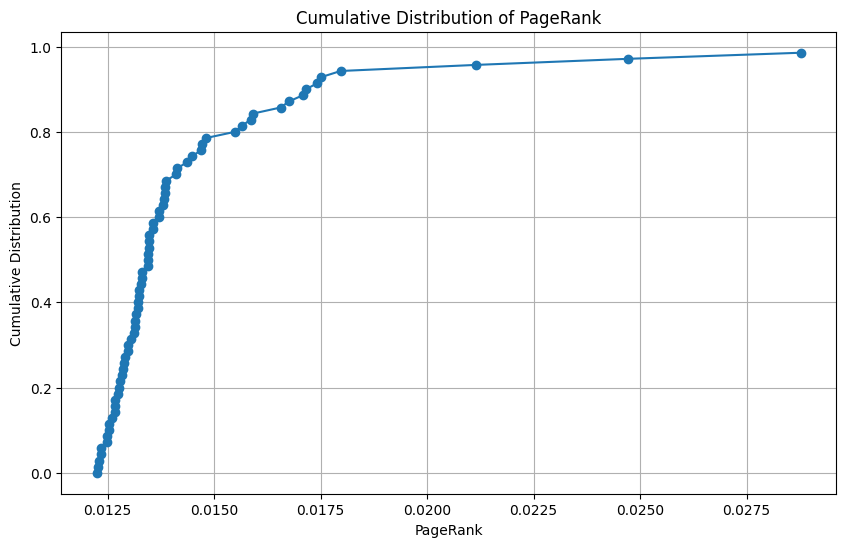

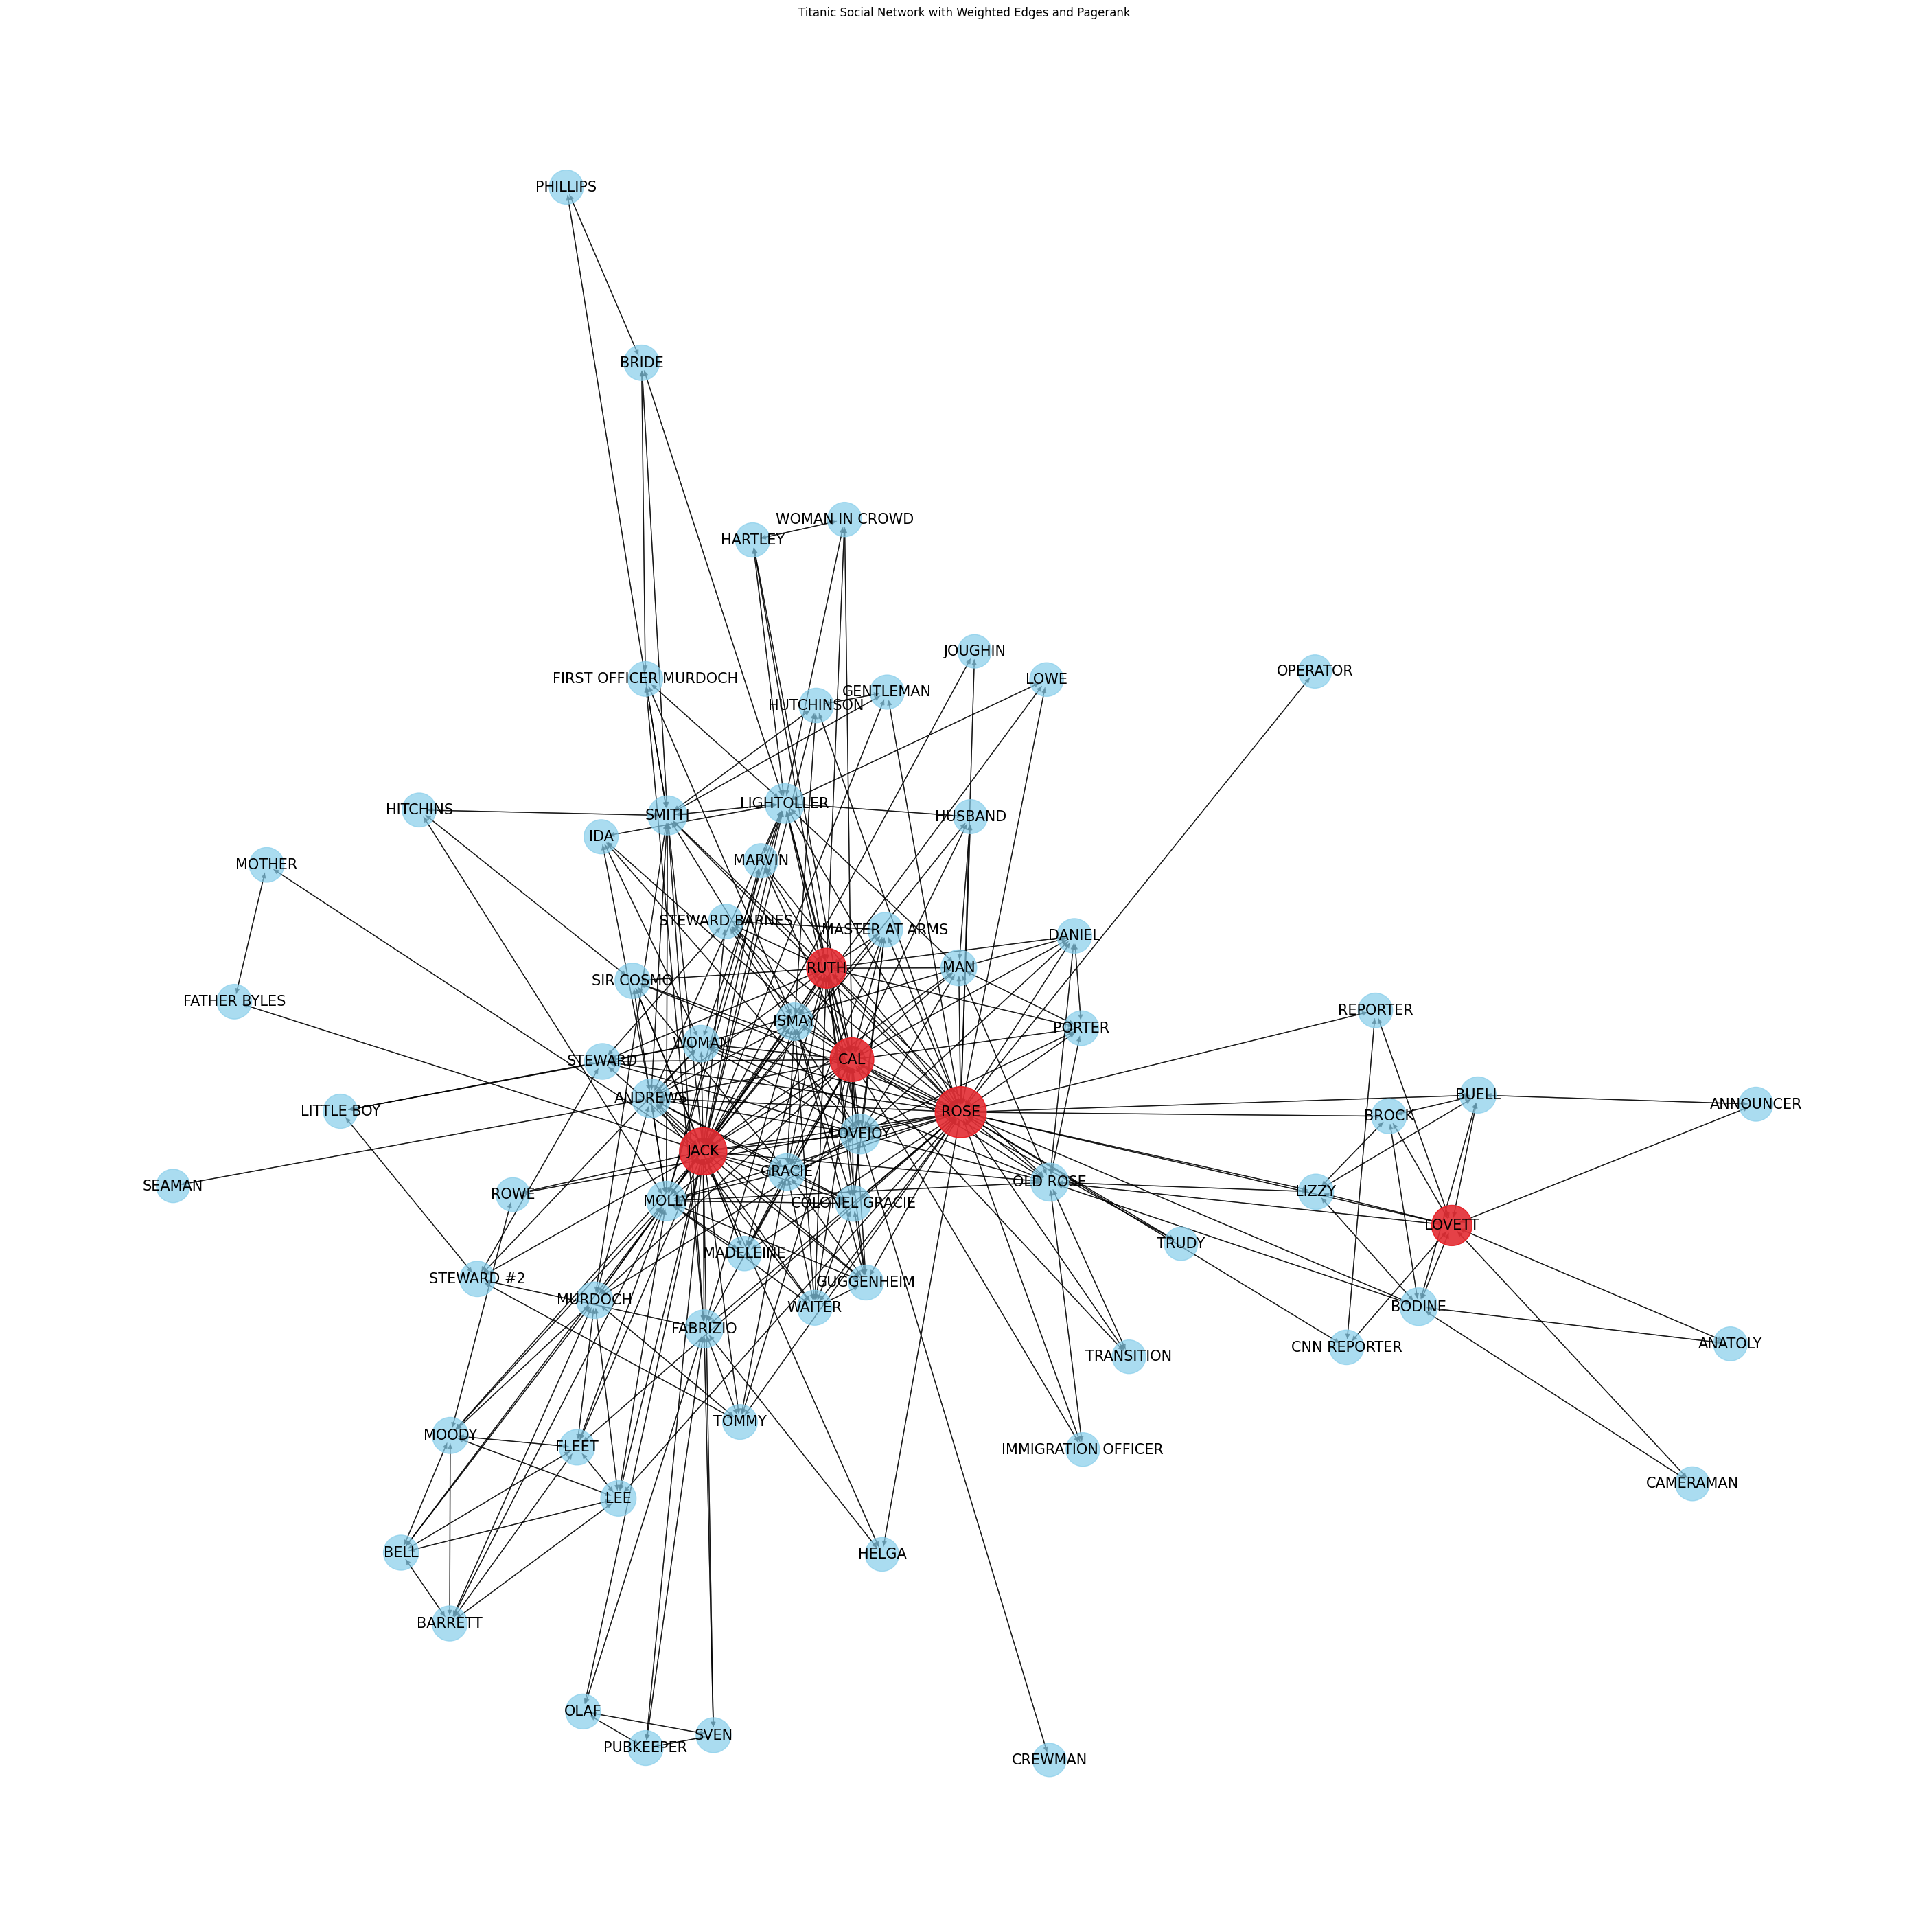

In [21]:
# Load the graph
G = load_graph()

# Compute pagerank
pagerank, _ = calculate_pagerank(G)

# Plot the cumulative distribution for PageRank
plot_cumulative_distribution(pagerank, 'PageRank')

# Custom plot to visualize the graph
id_to_name = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(36, 36))
pos = nx.spring_layout(G, seed=42) # Use the spring layout algorithm for positioning the nodes
node_sizes = [pagerank[node] * 100000 for node in G.nodes()]  # Adjust node sizes based on their degrees
edge_widths = [d['weight'] for _, _, d in G.edges(data=True)]  # Adjust edge widths based on their weightss
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
labels = {node: id_to_name[node] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=15)
top_5_nodes = list(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])  # Sort the nodes in descending order of PageRank and take the top 5
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, _ in top_5_nodes], node_color='red', node_size=[pagerank[node] * 100000 for node, _ in top_5_nodes], alpha=0.7)
plt.title("Titanic Social Network with Weighted Edges and Pagerank")
plt.axis("off")
plt.show()

## Week 6: Community Detection in Networks
## *Exploring and Analyzing Community Detection Methods*

### Objective
This week, we dive into *community detection techniques* in our graph, treating it as both *undirected* and *unweighted*. We will focus on implementing three distinct methods: **Bridge Removal**, **Modularity Optimization**, and **Label Propagation**. Our goal is to compare these methodologies in terms of *number of clusters*, *cluster sizes*, *computational efficiency*, and *modularity*, leading to an insightful discussion on their applicability and effectiveness.

## *Community Detection Techniques*
We begin by converting our graph to an undirected and unweighted form, concentrating on its *largest connected component*. We explore three community detection methods, each with its unique approach to deciphering the underlying community structures within the graph.

### Bridge Removal (Girvan-Newman Algorithm)
This technique progressively *removes* edges that act as *bridges* between communities. We utilize the **Girvan-Newman algorithm**, focusing on the partition with the *highest modularity*.

### Modularity Optimization
Here, we cluster nodes to *maximize* the network's *modularity* score. A *greedy algorithm* is employed for modularity optimization.

### Label Propagation
In this approach, nodes adopt the *majority label* of their neighbors, allowing communities to emerge organically through *label dissemination* across the network.

### Implementing Community Detection Methods
We implement these methods on our network graph. Each method's unique approach and results are examined, comparing their outcomes in terms of *cluster quantity*, *size distribution*, *computational time* and *modularity*.

#### Results and Discussion
- **Bridge Removal:** This method detected the *highest number of clusters*, indicating a *finer partitioning* of the network. However, it also had the *longest computational time*, suggesting it might be *less efficient* for larger networks. The *modularity* is *moderate*, which implies a reasonable but not optimal community structure.
- **Modularity Optimization:** This method found a *smaller number of larger clusters*, with the *highest modularity* score among the three. This suggests that it was able to detect a community structure that aligns well with the network's inherent modular structure. It also offers a *good balance* between computational efficiency and the quality of community detection.
- **Label Propagation:** Similar to Modularity Optimization in terms of the number of clusters, but it tends to produce *one significantly larger community*. It's the *fastest method* but has the *lowest modularity*, indicating a less precise community structure.

**Table:** *Summary of Community Detection Methods*
| Method                    | Clusters | Size Distribution  | Time (s) | Modularity |
|---------------------------|----------|--------------------|----------|------------|
| Bridge Removal            | 17       | Diverse            | 4.234    | 0.211      |
| Modularity Optimization   | 5        | Balanced           | 0.112    | 0.329      |
| Label Propagation         | 5        | One dominant cluster | 0.032  | 0.167      |

### Conclusion and Visualization
Reflecting on our findings, **Modularity Optimization** emerges as the *most balanced* approach, offering a blend of computational efficiency and effective community structuring. This method is chosen for visual representation using *Gephi*, showcasing the identified communities within our network graph.

### Loading the graph from the given CSV files

In [22]:
import networkx as nx
import csv
import time
from networkx.algorithms import community

# Function to load the graph
def load_graph(nodes_file_path, edges_file_path):
    G = nx.DiGraph()
    with open(nodes_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])

    with open(edges_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=1)
            G.add_edge(row['Target'], row['Source'], weight=1)  # For undirected links

    return G

### Community Detection Methods

In [23]:
# Function to convert partition to communities format
def convert_partition_to_communities(partition):
    communities = {}  # Dictionary to store the communities
    for node, community in partition.items():  # Iterate over the nodes and their communities
        if community not in communities:
            communities[community] = set()  # Initialize a new set for the community
        communities[community].add(node)  # Add the node to the community
    return list(communities.values())

# Bridge Removal using Girvan-Newman Algorithm
def community_detection_bridge_removal(G):
    communities_generator = community.girvan_newman(G)  # Run the Girvan-Newman algorithm
    best_partition = None  # To store the best partition
    best_modularity = -1  # To store the best modularity

    for communities in communities_generator:
        modularity = community.modularity(G, communities)  # Compute the modularity of the current partition
        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = communities

    partition_dict = {node: i for i, comm in enumerate(best_partition) for node in comm}  # Convert the partition to a dictionary
    return partition_dict, best_modularity

# Modularity Optimization using Greedy Algorithm
def community_detection_modularity_optimization(G):
    communities = community.greedy_modularity_communities(G)  # Run the greedy modularity algorithm
    partition = {node: i for i, comm in enumerate(communities) for node in comm}  
    return partition

# Label Propagation
def community_detection_label_propagation(G):
    communities = community.label_propagation_communities(G)  # Run the label propagation algorithm
    partition = {node: i for i, comm in enumerate(communities) for node in comm}
    return partition

### Load, convert to undirected and unweighted and extract the largest connected component

In [24]:
# Load the graph from the provided CSV files
nodes_file_path = '../Project/Graph/nodes.csv'
edges_file_path = '../Project/Graph/edges.csv'
G = load_graph(nodes_file_path, edges_file_path)

# Convert the graph to undirected and remove self-loops
G_undirected = G.to_undirected()
G_undirected.remove_edges_from(nx.selfloop_edges(G_undirected))

# Extract the largest connected component
largest_cc = max(nx.connected_components(G_undirected), key=len)
G_largest_cc = G_undirected.subgraph(largest_cc)

### Comparison of Community Detection Techniques

We will compare the results of the three community detection techniques based on:
- Number of Detected Clusters
- Cluster Size Distribution
- Modularity
- Computational Time (Using the time module)


In [25]:
# Use time to measure the execution time of the algorithms

# Apply Bridge Removal Method 
start_time = time.time()  
bridge_removal_partition, bridge_removal_modularity = community_detection_bridge_removal(G_largest_cc)  
bridge_removal_time = time.time() - start_time

# Apply Modularity Optimization Method
start_time = time.time()
modularity_optimization_partition = community_detection_modularity_optimization(G_largest_cc)
modularity_optimization_time = time.time() - start_time
modularity_optimization_communities = convert_partition_to_communities(modularity_optimization_partition)
modularity_optimization_modularity = community.modularity(G_largest_cc, modularity_optimization_communities)

# Apply Label Propagation Method
start_time = time.time()
label_propagation_partition = community_detection_label_propagation(G_largest_cc)
label_propagation_time = time.time() - start_time
label_propagation_communities = convert_partition_to_communities(label_propagation_partition)
label_propagation_modularity = community.modularity(G_largest_cc, label_propagation_communities)

In [26]:
# Print the results of the Bridge Removal Method
print("Bridge Removal Method:")
print("Time taken: ", bridge_removal_time)
print("Modularity: ", bridge_removal_modularity)
print("Partition: ", bridge_removal_partition)
print("\n")

# Print the results of the Modularity Optimization Method
print("Modularity Optimization Method:")
print("Time taken: ", modularity_optimization_time)
print("Modularity: ", modularity_optimization_modularity)
print("Partition: ", modularity_optimization_partition)
print("\n")

# Print the results of the Label Propagation Method
print("Label Propagation Method:")
print("Time taken: ", label_propagation_time)
print("Modularity: ", label_propagation_modularity)
print("Partition: ", label_propagation_partition)

Bridge Removal Method:
Time taken:  2.411370038986206
Modularity:  0.210517779443183
Partition:  {'5100274': 0, '5098583': 0, '5097941': 0, '5102924': 0, '5097316': 0, '5102690': 0, '5102237': 0, '5098606': 0, '5099110': 0, '5102939': 0, '5097915': 0, '5100235': 0, '5102317': 0, '5100134': 0, '5101061': 0, '5099090': 0, '5099903': 0, '5103789': 0, '5098545': 0, '5098717': 0, '5097875': 0, '5106033': 0, '5098463': 0, '5098095': 0, '5098619': 0, '5099096': 0, '5104295': 0, '5097979': 0, '5097994': 0, '5100333': 0, '5098041': 0, '5099267': 0, '5100327': 0, '5102267': 0, '5097894': 0, '5096932': 1, '5099349': 1, '5096948': 1, '5097161': 1, '5097296': 1, '5097262': 1, '5097320': 1, '5097212': 1, '5097505': 1, '5096969': 1, '5098128': 2, '5098193': 2, '5098082': 2, '5098088': 2, '5098242': 3, '5101840': 3, '5101998': 3, '5101981': 3, '5102009': 3, '5101285': 3, '5101750': 4, '5101041': 4, '5098541': 5, '5098267': 6, '5103242': 7, '5103072': 8, '5102841': 9, '5105174': 10, '5105151': 10, '509

#### Gephi Visualization

In [27]:
# Add community information to the graph
nx.set_node_attributes(G_largest_cc, modularity_optimization_partition, 'Community_mod')

# Export the graph to a GEXF file for Gephi
nx.write_gexf(G_largest_cc, "../G_largest_cc.gexf")

# Use the .gexf file to visualize the graph in Gephi
# Apply Force Atlas 2 layout algorithm
# Export as image and save for notebook visualization

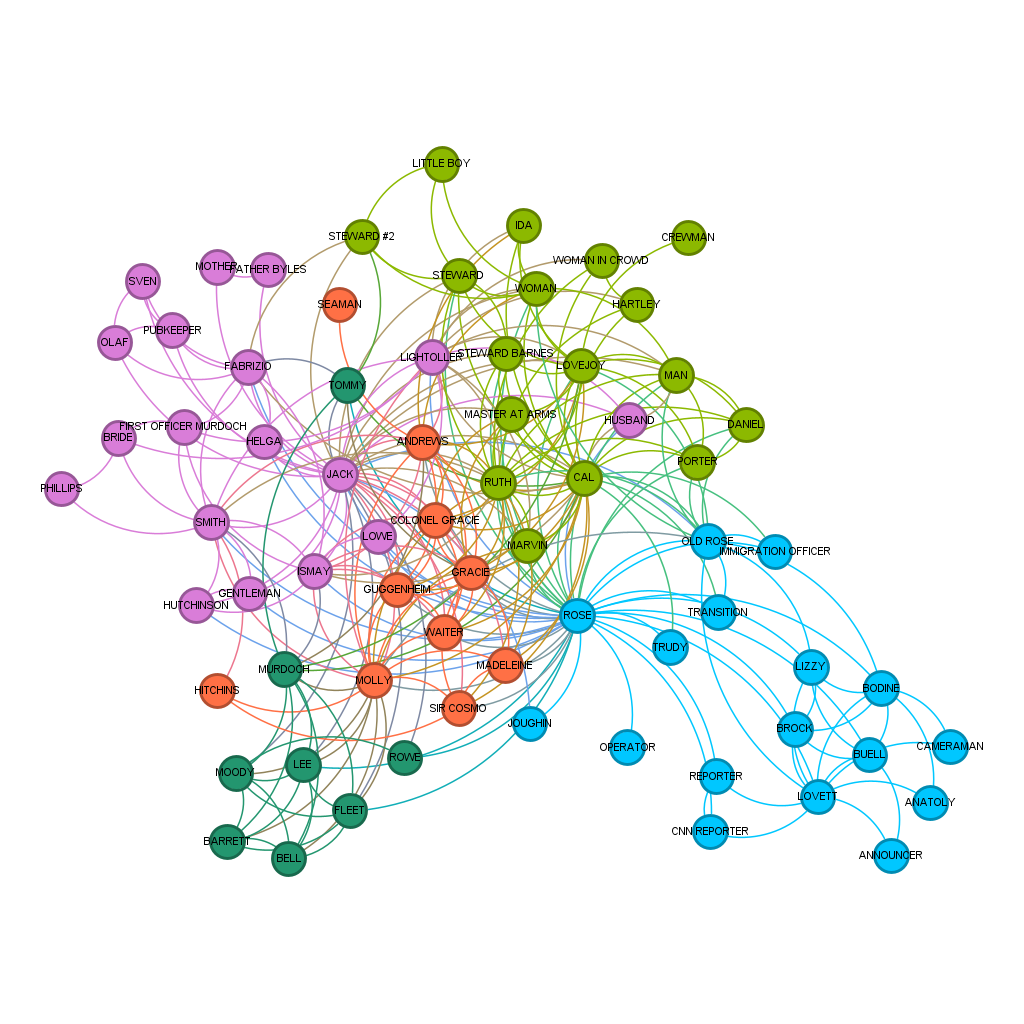

## Week 7: Link prediction
## *Common neighbours and topological indices*

### Objective
This week objective is to compute different **topological similarity indices**, returning a frame where each row is a *missing link* and each column is an *index*.\
Once the similarity indices are computed, we have to *synthesize* them properly to obtain the **link likelihood scores**.\
We have to calculate a score using an *aggregation function* - the **arithmetic mean** - between the two indices, as another parameter of evaluation.\
This value obtained will be added to the Pandas dataframe in a third column, then used to *rank* the missing links - the node pairs yielding the largest 5 values - for each of the three scores, in order to *predict* the most likely ones with the **top 5** ones.

## *Transforming the graph: undirected and unweighted without self loops*
Inside the `load_graph()` function we loaded both nodes and edges, and we used the function `to_undirected()` to convert the directed graph $G$ to an *undirected graph* $U$.\
Then, we used the function `remove_edges_from()` which removes *self-loops* (connecting a node to itself) from the undirected graph $U$.\
Moeover, we have analyzed the **Largest Connected Component** $LCC$: after finding it we created a **subgraph** containing *only the nodes* in the largest connected *component*, printing them; this can be critical to understand the *cohesion or segmentation* of the network.

## *Calculating the topological indices*
We start by creating an *empty undirected graph* called $G$, loading then all edges and nodes.\
We subsequently computed two network *topological indices*, **Common Neighbors** $CN$ and **Preferential Attachment** $PA$, for *all non-existing edges* (potential future links) in a the graph.\
Getting into detail... After identifying *non-edges*, meaning all pairs of nodes in the graph that are not connected by an edge, we have obtained $CN$ calculating the *number of common neighbors* they share for each *pair of non-connected nodes*. This is a measure of how many mutual connections two nodes have, which can be extremely important to indicate the **likelihood** of them forming a possible **connection in the future**.\
Afterwards, we calculated $PA$: for each *pair of non-connected nodes*, we obtained the *product* of their *degrees* (meaning the number of connections they have). This index is based on the idea that nodes with *higher degrees* are **more likely to form new connections**.\
Fianlly, we created the *DataFrame* in order to **organize the CN and PA values** for easier analysis and visualization.

### Insights and Interpretations
- **Focusing on LCC**: Analyzing the largest connected component can be particularly insightful, as it represents the *most interconnected part* of the network, often containing *crucial information* about the network's structure.

- **Common Neighbors (CN)**: High CN values suggest that two nodes are part of *tightly-knit communities*, increasing the *likelihood of a future link*.

- **Preferential Attachment (PA)**: This concept suggests that nodes with *many connections* are *more likely to acquire even more* connections.

## *Computing the likelihood score: arithmetic mean*
The `rescale()` function has the purpose to *rescale* a Pandas series to a *range [0,1]*, while the `min()` and `max()` functions help us identify those values in the series and return the **rescaled series** where each value is transformed to fall within the range. This is done by *subtracting the minimum value* from each element and *dividing by the range (max - min)*.\
After that, our goal is to add a *new column* with the *mean* for each index. We applied `rescale()` to the $CN$ and $PA$ columns in the DataFrame, creating two new columns: $CN\_scaled$ and $PA\_scaled$.\
Finally, the **mean of the scaled values** for each row is calculated and added as a *new column* $Mean\_CN\_PA$ in the DataFrame.\
Now we apply `compute_CN_PA()` and `add_mean_column()` to the graph, particularly extracting the largest connected component $LCC$. 

### Insights and Interpretations
- **Rescaling**: Rescaling the $CN$ and $PA$ values to a 0-1 range *normalizes these metrics*, making them *directly comparable* regardless of their original scales or distributions. This is particularly useful when these metrics vary widely in scale or when combining them.

- **Mean of Scaled Values**: Computing the mean of $CN\_scaled$ and $PA\_scaled$ provides a single metric that *balances the influence* of both CN and PA. This can be useful for *analyzing potential connections* in the network by considering both the likelihood of connection (suggested by $CN$) and the network influence (indicated by $PA$).

## *Finding top missing links*
We initialized `find_top_missing_links()` which aim is to find the *top 5 pairs of nodes* (potential missing links) in a DataFrame based on specified indices.\
First of all, we store the *missing links* for each index in a dictionary, by iterating over the provided *list of indices*. We then select the *top 5 links* after sorting in *descending order* based on the current index: this implies that the function is looking for the *highest scores in each index*.\
It *extracts* the node pairs from the $Node1$ and $Node2$ columns of the sorted DataFrame and stores them in the dictionary *under the corresponding index*.
We call the function, providing it with the list of indices (e.g., $CN$, $PA$, $Mean\_CN\_PA$), so to identify the **top 5 potential missing links** in the network based on each index.

### Insights and Interpretations
- **Network Link Prediction**: The function is designed for link prediction in networks, a key task in network analysis. It identifies pairs of nodes that, based on certain metrics, are *most likely to form a link*.

- **Multiple Metrics for Prediction**: By using different indices ($CN$, $PA$, $Mean\_CN\_PA$), the function offers a multifaceted view of *potential connections*. Each index provides a different perspective:
    - **$CN$ (Common Neighbors)**: Suggests that nodes with *many mutual connections* are more likely to connect.
    - **$PA$ (Preferential Attachment)**: Implies that nodes with *high degrees* (many connections) are more likely to form new connections.
    - **$Mean\_CN\_PA$**: A *balanced metric* combining both CN and PA perspectives.

In summary, the `find_top_missing_links()` function is a tool for identifying potential areas of *growth or evolution* within a network by highlighting the node pairs most likely to connect according to different network metrics.

### Imports and transforming the graph

In [28]:
import networkx as nx
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def load_graph(nodes_file_path='../Project/Graph/nodes.csv', edges_file_path='../Project/Graph/edges.csv'):
    G = nx.DiGraph()  # Create a directed graph
    with open(nodes_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])  # Add nodes to the graph with the label

    with open(edges_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'], weight=1)  # Add edges to the graph with same weight = 1 (unweighted)

    U = G.to_undirected()  # Transform the graph into an undirected
    U.remove_edges_from(nx.selfloop_edges(U))  # Remove self loops
    
    # Check the size of the largest connected component
    LCCNodes = list(max(nx.connected_components(U), key=len)) # Get the nodes of the largest connected component
    LCC = U.subgraph(LCCNodes)  # Create the largest connected component as a subgraph of the original graph
    
    print(f"The number of \033[1mnodes\033[0m in the LCC is: \033[1m{LCC.number_of_nodes()}\033[0m")
    print(f"The number of \033[1medges\033[0m in the LCC is: \033[1m{LCC.number_of_edges()}\033[0m")

    return

load_graph()

The number of nodes in the LCC is: 70
The number of edges in the LCC is: 299


### Computing the topological indices

In [29]:
def load_graph(nodes_file_path='../Project/Graph/nodes.csv', edges_file_path='../Project/Graph/edges.csv'):
    G = nx.Graph()  # Create empty undirected graph
    
    with open(nodes_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_node(row['Id'], label=row['Label'])  # Add nodes to the graph with the label

    with open(edges_file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            G.add_edge(row['Source'], row['Target'])  # Add edges to the graph
    
    return G


def compute_CN_PA(graph):
    # Get all non-edges from the graph (potential future links)
    non_edges = list(nx.non_edges(graph))
    
    # Calculate Common Neighbors (CN) for each non-edge
    CN = [(graph.nodes[u]['label'], graph.nodes[v]['label'], len(list(nx.common_neighbors(graph, u, v)))) for u, v in non_edges]
    # Number of common neighbors u and v share for each pair of non-connected nodes
    
    # Calculate Preferential Attachment (PA) for each non-edge
    PA = [(graph.nodes[u]['label'], graph.nodes[v]['label'], graph.degree(u) * graph.degree(v)) for u, v in non_edges]
    # Product of the degrees of u and v - so number of connections they have - for each pair of non-connected nodes
    
    # Convert the results to a dataframe
    df = pd.DataFrame({
        'Node1': [u for u, v, _ in CN],  # Get the first node from the CN list
        'Node2': [v for u, v, _ in CN],  # Get the second node from the CN list
        'CN': [index for _, _, index in CN],  # Get the number of common neighbors from the CN list
        'PA': [index for _, _, index in PA]  # Get the number of neighbors from the PA list
    })

    return df

graph = load_graph()
lcc_nodes = max(nx.connected_components(graph), key=len)  # Get the nodes of the largest connected component
lcc = graph.subgraph(lcc_nodes)  # Create the largest connected component as a subgraph of the original graph

# Compute metrics on the LCC
df = compute_CN_PA(lcc)  # Create the dataframe with the results
print(df)

           Node1       Node2  CN   PA
0         MOTHER   MADELEINE   1   14
1         MOTHER        BELL   0   12
2         MOTHER       BRIDE   0    8
3         MOTHER  STEWARD #2   1   12
4         MOTHER     HARTLEY   0    8
...          ...         ...  ..  ...
2111    REPORTER  GUGGENHEIM   1   30
2112    REPORTER  HUTCHINSON   1   15
2113    REPORTER        RUTH   1   75
2114  GUGGENHEIM  HUTCHINSON   3   50
2115  HUTCHINSON        RUTH   4  125

[2116 rows x 4 columns]


### Rescaling and computing the likelihood score - mean

In [30]:
def rescale(series):
    min_val = series.min()  # Get the minimum value of the series
    max_val = series.max()  # Get the maximum value of the series
    return (series - min_val) / (max_val - min_val)  # Rescale the series, subtracting the minimum and dividing by the difference between the maximum and minimum

def add_mean_column(df):
    # First, we rescale the 'CN' and 'PA' columns
    df['CN_scaled'] = rescale(df['CN'])
    df['PA_scaled'] = rescale(df['PA'])

    # Then, we compute the arithmetic mean of the scaled values
    df['Mean_CN_PA'] = df[['CN_scaled', 'PA_scaled']].mean(axis=1)
    return df

# Load the graph and extract the LCC
graph = load_graph()
lcc_nodes = max(nx.connected_components(graph), key=len)
lcc = graph.subgraph(lcc_nodes)

# Compute CN and PA on the LCC
df = compute_CN_PA(lcc)

# Add the mean column to the DataFrame
df = add_mean_column(df)
print(df)

           Node1       Node2  CN   PA  CN_scaled  PA_scaled  Mean_CN_PA
0         MOTHER   MADELEINE   1   14        0.1   0.023593    0.061797
1         MOTHER        BELL   0   12        0.0   0.019964    0.009982
2         MOTHER       BRIDE   0    8        0.0   0.012704    0.006352
3         MOTHER  STEWARD #2   1   12        0.1   0.019964    0.059982
4         MOTHER     HARTLEY   0    8        0.0   0.012704    0.006352
...          ...         ...  ..  ...        ...        ...         ...
2111    REPORTER  GUGGENHEIM   1   30        0.1   0.052632    0.076316
2112    REPORTER  HUTCHINSON   1   15        0.1   0.025408    0.062704
2113    REPORTER        RUTH   1   75        0.1   0.134301    0.117151
2114  GUGGENHEIM  HUTCHINSON   3   50        0.3   0.088929    0.194465
2115  HUTCHINSON        RUTH   4  125        0.4   0.225045    0.312523

[2116 rows x 7 columns]


### Finding the top 5 missing links

In [31]:
def find_top_missing_links(df, indices):
    predicted_missing_links = {}  # Create an empty dictionary to store the results
    for index in indices:
        # Sort the DataFrame based on the index in descending order to get the top scores
        sorted_df = df.sort_values(by=index, ascending=False).head(5)
        # Extract the Node1 and Node2 columns to get the pairs
        predicted_missing_links[index] = sorted_df[['Node1', 'Node2']].values.tolist()
    return predicted_missing_links

# Ensure that the indices are in a list for iteration
indices = ['CN', 'PA', 'Mean_CN_PA']

# Identify the top missing links for each index
top_missing_links = find_top_missing_links(df, indices)

# Display the results
for index, links in top_missing_links.items():
    print(f"The top 5 missing links for the {index} index are:")
    for link in links:
        print(f"\033[1m{link[0]} - {link[1]}\033[0m")
    print('')

The top 5 missing links for the CN index are:
LOVEJOY - MOLLY
MURDOCH - JACK
WOMAN - RUTH
ISMAY - LIGHTOLLER
ROSE - MURDOCH

The top 5 missing links for the PA index are:
ROSE - MURDOCH
SMITH - CAL
MURDOCH - JACK
LOVEJOY - MOLLY
LOVETT - JACK

The top 5 missing links for the Mean_CN_PA index are:
ROSE - MURDOCH
MURDOCH - JACK
SMITH - CAL
LOVEJOY - MOLLY
WOMAN - RUTH

